In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-test/ultra-distance.csv


In [16]:
df = pd.read_csv('/kaggle/input/data-test/ultra-distance.csv')
df

,time,value
0,2024-07-31T03:57:21.684075159Z,124
1,2024-07-31T03:57:22.709918036Z,48
2,2024-07-31T03:57:23.73395366Z,167
3,2024-07-31T03:57:24.757809455Z,55
4,2024-07-31T03:57:25.779148861Z,49
...,...,...
1123,2024-07-31T04:21:14.583128633Z,75
1124,2024-07-31T04:21:15.6069519Z,262
1125,2024-07-31T04:21:17.65420233Z,69
1126,2024-07-31T04:21:18.781069716Z,62


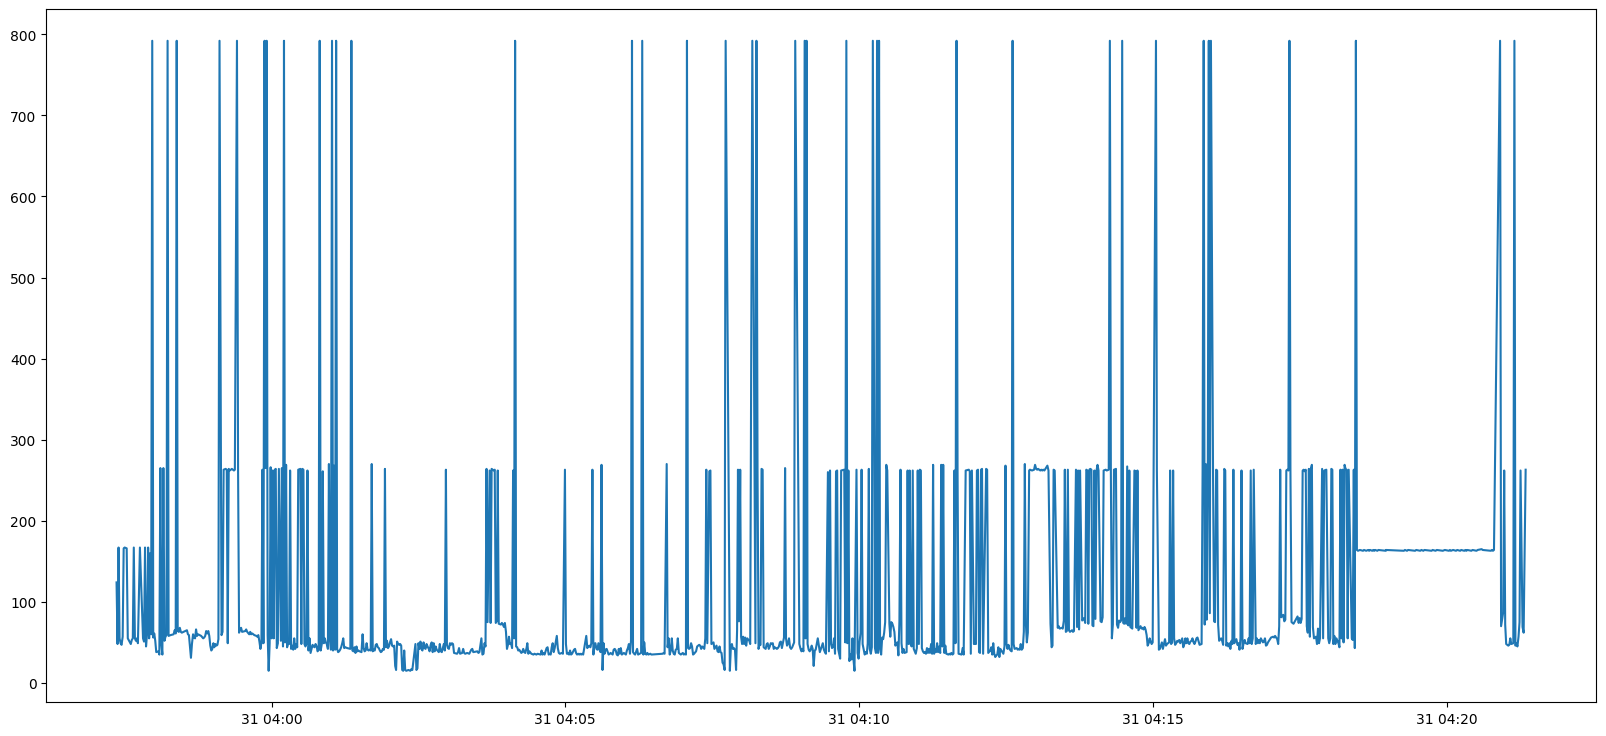

In [19]:
import matplotlib.pyplot as plt

df.time = pd.to_datetime(df.time)
plt.figure(figsize=(20,9))
plt.plot(df.time,df.value)
plt.show()

/tmp/ipykernel_33/1749321638.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.time = pd.to_datetime(df_no_outliers.time)


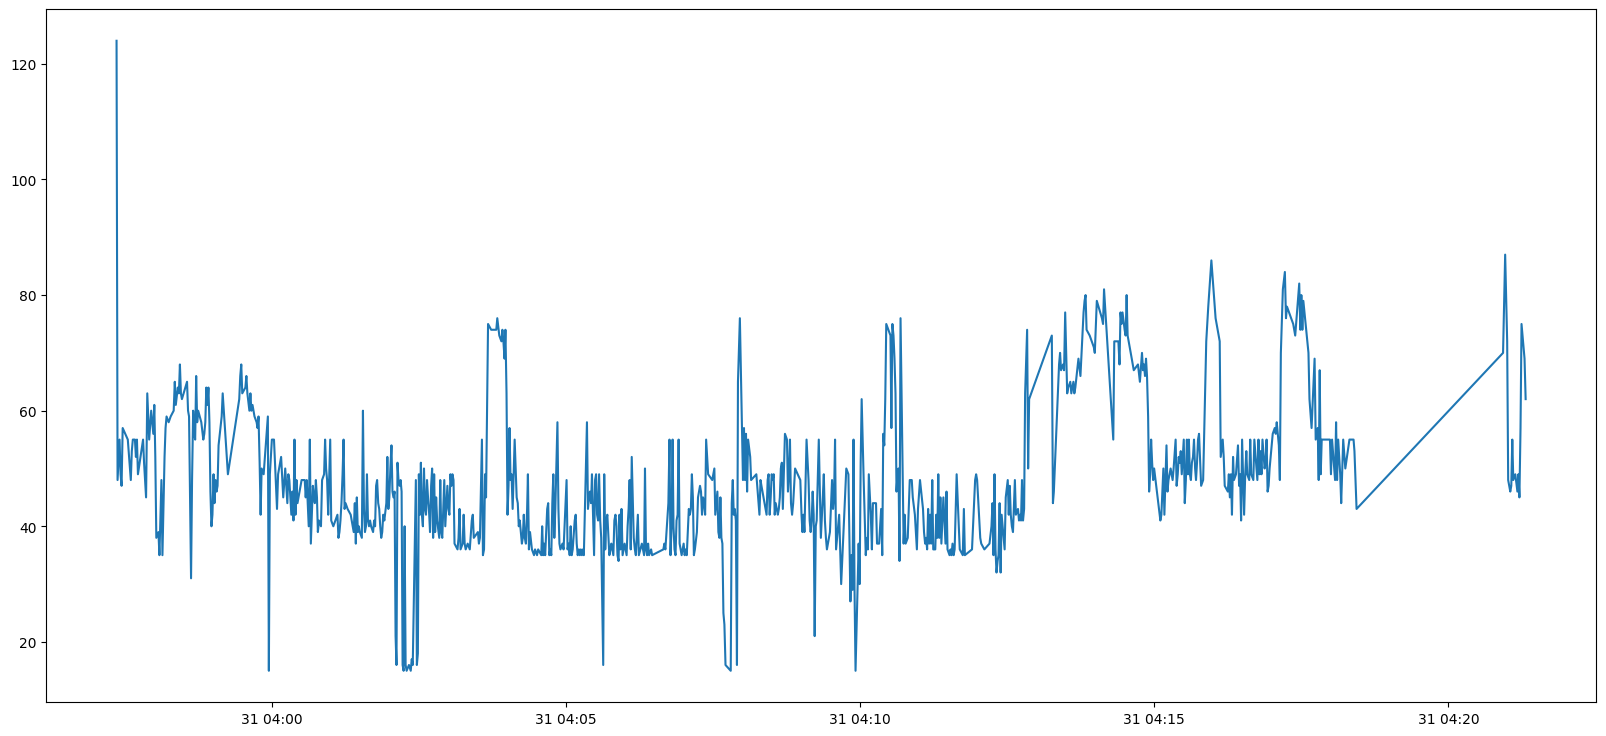

In [14]:
import matplotlib.pyplot as plt

Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df['value'] >= (Q1 - 1.5 * IQR)) & (df['value'] <= (Q3 + 1.5 * IQR))]

df_no_outliers.time = pd.to_datetime(df_no_outliers.time)
plt.figure(figsize =(20,9))
plt.plot(df_no_outliers.time,df_no_outliers.value)
plt.show()